In [3]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds/snp_scores.tsv"
enformer_dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds_enformer/snp_scores.tsv"
atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/dsqtl_preds/snp_scores.tsv"

In [17]:
dsqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
dsqtls_dnase[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_dnase['META_DATA'].str.split(",", expand=True)

enformer_dsqtls_dnase = pd.read_csv(enformer_dnase_preds,sep="\t", header=0, index_col=False)
enformer_dsqtls_dnase[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_dnase['META_DATA'].str.split(",", expand=True)

dsqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)
dsqtls_atac[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_atac['META_DATA'].str.split(",", expand=True)



In [18]:
dsqtls_dnase.shape

(28308, 18)

In [19]:
enformer_dsqtls_dnase.shape

(28233, 18)

In [23]:
sum(enformer_dsqtls_dnase["label"].astype(int)==1)

574

In [29]:
roc_auc = metrics.average_precision_score(enformer_dsqtls_dnase["label"].astype(int), abs(enformer_dsqtls_dnase["log_counts_diff"]))

print(roc_auc)

0.31667568927503953


In [42]:
dsqtls_atac["label"] = dsqtls_atac["label"].astype(int)
dsqtls_atac["abs_gkm_SVM"] = dsqtls_atac["abs_gkm_SVM"].astype(float)

dsqtls_dnase["label"] = dsqtls_dnase["label"].astype(int)
dsqtls_dnase["abs_gkm_SVM"] = dsqtls_dnase["abs_gkm_SVM"].astype(float)

enformer_dsqtls_dnase["label"] = enformer_dsqtls_dnase["label"].astype(int)
enformer_dsqtls_dnase["abs_gkm_SVM"] = enformer_dsqtls_dnase["abs_gkm_SVM"].astype(float)


In [32]:
dsqtls_atac.head()

,CHR,POS0,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label
0,chr1,846445,A,G,"2.653531,7.938784,2.653531,7.938784,-1.522533,...",-0.341796,-271.06506,-0.109347,2.653531,7.938784,2.653531,7.938784,-1.522533,0.48,0.53,0.75,-0.682,1
1,chr1,901457,G,A,"2.821422,6.027648,2.821422,6.027648,1.739152,0...",0.193605,172.31250,0.078106,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.15,1
2,chr1,1176364,T,A,"-7.167236,-10.870018,7.167236,10.870018,-0.091...",0.410028,151.35158,0.065117,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1
3,chr1,1217274,A,G,"-3.957382,2.387491,3.957382,2.387491,1.127472,...",0.902642,587.30383,0.263455,-3.957382,2.387491,3.957382,2.387491,1.127472,0.34,0.43,0.49,2.43,1
4,chr1,1580437,A,G,"-4.785596,-6.827102,4.785596,6.827102,0.665464...",0.268798,121.87872,0.078786,-4.785596,-6.827102,4.785596,6.827102,0.665464,0.38,0.35,0.86,1.64,1


In [33]:
sum(dsqtls_atac["label"]==1)

574

28308 574


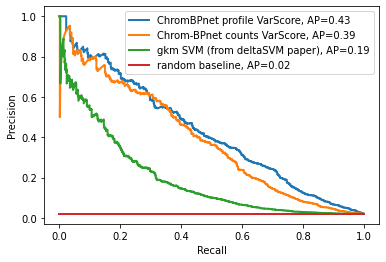

In [37]:
dsqtl=dsqtls_atac

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet profile VarScore, AP="+str(round(roc_auc,2)))

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet counts VarScore, AP="+str(round(roc_auc,2)))

fpr_gkm, tpr_gkm, _ = precision_recall_curve(dsqtl["label"],abs(dsqtl["abs_gkm_SVM"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["abs_gkm_SVM"]))
plt.plot(tpr_gkm, fpr_gkm, linewidth=2, label="gkm SVM (from deltaSVM paper), AP="+str(round(roc_auc,2)))

in1 = list(dsqtl["label"])
random.shuffle(in1)
in1=np.array(in1)

fpr_random, tpr_random, _ = precision_recall_curve(dsqtl["label"], in1)
roc_auc = metrics.average_precision_score(dsqtl["label"], in1)
plt.plot(tpr_random, [sum(dsqtl["label"]==1)/len(dsqtl["label"])]*len(fpr_random), linewidth=2, label="random baseline, AP="+str(round(roc_auc,2)))

print(len(dsqtl["label"]), sum(dsqtl["label"]==1))
plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

#plt.savefig("pr_curve_atac_dsqtls_gm.pdf")
plt.savefig("subfigs/pr_curve_atac_dsqtls_gm.pdf", transparent=True, dpi=300)



28233 574


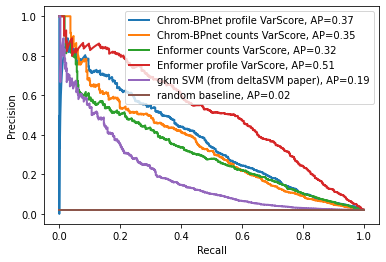

In [44]:
dsqtl= dsqtls_dnase

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_probs_diff_abs_sum"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet profile VarScore, AP="+str(round(roc_auc,2)))

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Chrom-BPnet counts VarScore, AP="+str(round(roc_auc,2)))

dsqtl = enformer_dsqtls_dnase

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["log_counts_diff"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer counts VarScore, AP="+str(round(roc_auc,2)))


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtl["label"], abs(dsqtl["probs_jsd_diff"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["probs_jsd_diff"]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer profile VarScore, AP="+str(round(roc_auc,2)))


fpr_gkm, tpr_gkm, _ = precision_recall_curve(dsqtl["label"],abs(dsqtl["abs_gkm_SVM"]))
roc_auc = metrics.average_precision_score(dsqtl["label"], abs(dsqtl["abs_gkm_SVM"]))
plt.plot(tpr_gkm, fpr_gkm, linewidth=2, label="gkm SVM (from deltaSVM paper), AP="+str(round(roc_auc,2)))

in1 = list(dsqtl["label"])
random.shuffle(in1)
in1=np.array(in1)

fpr_random, tpr_random, _ = precision_recall_curve(dsqtl["label"], in1)
roc_auc = metrics.average_precision_score(dsqtl["label"], in1)
plt.plot(tpr_random, [sum(dsqtl["label"]==1)/len(dsqtl["label"])]*len(fpr_random), linewidth=2, label="random baseline, AP="+str(round(roc_auc,2)))

print(len(dsqtl["label"]), sum(dsqtl["label"]==1))
plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.savefig("subfigs/pr_curve_dnase_dsqtls_gm.pdf", transparent=True, dpi=300)


In [45]:
import pickle as pkl
import os
output_dir="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds_enformer/"
data = pkl.load(open(os.path.join(output_dir+"predictions_at_snp.pkl"),'rb'))


In [46]:
used_ids = data["ids"]
rsids = data["rsids"] 
ref_preds = data["ref_logcount_preds"] 
alt_preds = data["alt_logcount_preds"]



In [47]:
print(ref_preds.shape)
print(alt_preds.shape)

midpoint = alt_preds.shape[1]//2
ref_prob_preds = ref_preds/ref_preds.sum(axis=1)[:,None]
alt_prob_preds = alt_preds/alt_preds.sum(axis=1)[:,None]

print(ref_prob_preds.shape)
print(alt_prob_preds.shape)

ref_logcount_preds = np.log(np.squeeze(np.sum(ref_preds, axis = 1))) 
alt_logcount_preds = np.log(np.squeeze(np.sum(alt_preds, axis = 1)))

print(ref_logcount_preds.shape)
print(alt_logcount_preds.shape)

(28309, 896)
(28309, 896)
(28309, 896)
(28309, 896)
(28309,)
(28309,)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
